In [1]:
from os.path import join as pathjoin
from data_processing import *
from interpretation import *
from models import *
from training import *

In [2]:
DATA_DIR = '/home/mlepekhin/data/min_gpt_big_bpe'
MODELS_DIR = '/home/mlepekhin/models'
MODEL_ID = 'allennlp_bert_base_cased'
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

In [3]:
transformer_model = 'bert-base-cased'
MAX_TOKENS = 512

### Loading of the pretrained model

In [4]:
vocab = Vocabulary().from_files(pathjoin(MODELS_DIR, MODEL_ID, 'vocab'))
model = build_transformer_model(vocab, transformer_model)

Building the model


In [5]:
id_to_label = vocab.get_index_to_token_vocabulary('labels')
print(id_to_label)
print(id_to_label.values())

{0: 'A1', 1: 'A12', 2: 'A7', 3: 'A16', 4: 'A8', 5: 'A22', 6: 'A4', 7: 'A11', 8: 'A14', 9: 'A9', 10: 'A17'}
dict_values(['A1', 'A12', 'A7', 'A16', 'A8', 'A22', 'A4', 'A11', 'A14', 'A9', 'A17'])


In [6]:
if torch.cuda.is_available():
    cuda_device = 1
else:
    cuda_device = -1
print(cuda_device)
model.load_state_dict(torch.load(BEST_MODEL, map_location=f'cuda:{cuda_device}'))

1


<All keys matched successfully>

### Data loading

In [7]:
en_test_df = pd.read_csv(pathjoin(DATA_DIR, 'en'))
en_test_df.head()

,Unnamed: 0,target,text
0,0,A4,immigration are up there ? ' said Herrick . Da...
1,1,A4,"##chenman , who had come to love one . She had..."
2,2,A4,Active BY : The Green Eye of the Little Yellow...
3,3,A4,utters between those scenes and Madge had been...
4,4,A4,buckets . He took aim at his dinner and finish...


In [8]:
true_classes = en_test_df.target.values
sentences = en_test_df.text.values

### Preliminary analysis

In [9]:
dataset_reader = build_transformer_dataset_reader(transformer_model, MAX_TOKENS)
predictor = TextClassifierPredictor(model, dataset_reader=dataset_reader)
predicted_classes = np.array(predict_classes(sentences, predictor, vocab))

In [10]:
print(type(predicted_classes == 'A1'))

<class 'numpy.ndarray'>


In [11]:
print(len(np.unique(true_classes)))

11


In [12]:
calc_classifier_metrics(predicted_classes, true_classes)

label (argum) f1_score 0.6938775510204082 precision 0.85 recall 0.5862068965517241
label (fictive) f1_score 0.9090909090909091 precision 1.0 recall 0.8333333333333334
label (instruct) f1_score 0.8333333333333333 precision 1.0 recall 0.7142857142857143
label (reporting) f1_score 0.7567567567567567 precision 0.7 recall 0.8235294117647058
label (legal) f1_score 0.787878787878788 precision 0.65 recall 1.0
label (personal) f1_score 0.7843137254901961 precision 1.0 recall 0.6451612903225806
label (commercial) f1_score 0.6842105263157895 precision 0.65 recall 0.7222222222222222
label (research) f1_score 0.7222222222222223 precision 0.65 recall 0.8125
label (info) f1_score 0.46808510638297873 precision 0.55 recall 0.4074074074074074
label (eval) f1_score 0.5517241379310346 precision 0.4 recall 0.8888888888888888
label (stuff) f1_score 0.4999999999999999 precision 0.35 recall 0.875
accuracy 0.7090909090909091


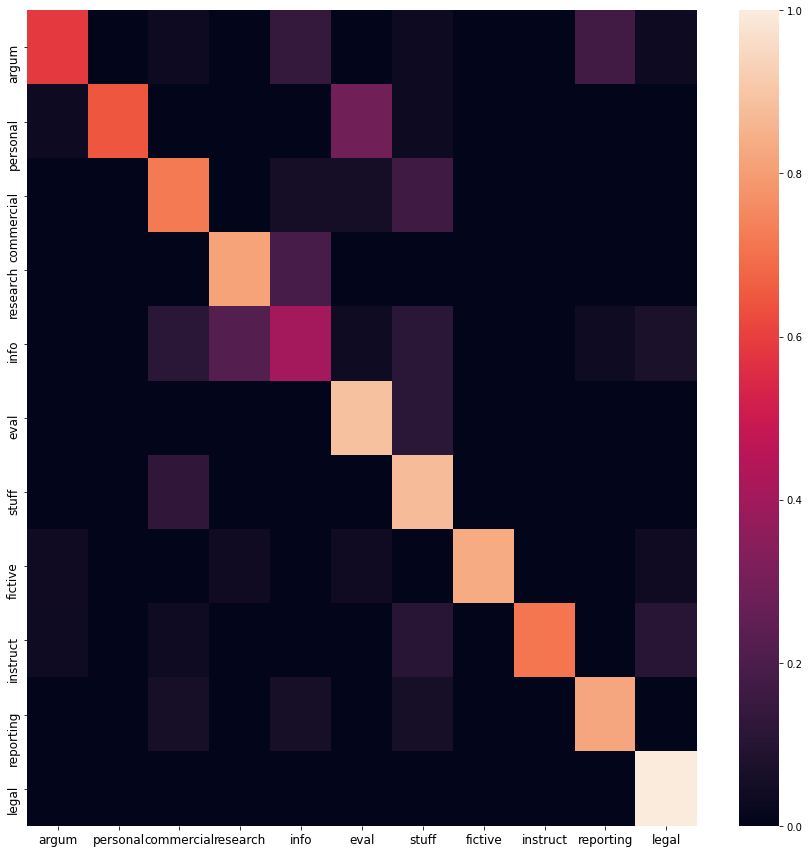

In [13]:
plot_confusion_matrix(predicted_classes, true_classes)

### Saliency Gradient Interpretation

In [14]:
smooth_grad = SmoothGradient(predictor)
simple_grad = SimpleGradient(predictor)
integrated_grad = IntegratedGradient(predictor)

In [15]:
mistake_ids = []

for sent_id in range(len(true_classes)):
    if true_classes[sent_id] != predicted_classes[sent_id]:
        mistake_ids.append(sent_id)

In [16]:
interpret_sentence(
    sentences[mistake_ids[0]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[0]]],
    label_description[predicted_classes[mistake_ids[0]]]
)

TRUE LABEL: research
LABEL: info
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
Princeton researchers discovered that the plant ' s first tower was a tech ##no ##genic barren area in 1972 when { enclosed in 1997 ] the film had been deposited on a steel - water interface . This gas reporting produced a very high intensity and , a fraction of the deposits formed by the Italian group compared to the American species . This was the first to ##c ##ms ##ter ##ile of the material , referred to as the ' G ##uin ##s ' ( for the modern location ) in the school of advanced residential property were published . As the result of these conclusions the use of the t ##rig ##ram modelling process and they consider this type of analysis . The " Company " and " the model is simulation ##s that show the performance of the products . Of particular interest is rarely true of the modern major innovations , the C - C - C bond , and are therefore never occupied . The ot

In [17]:
interpret_sentence(
    sentences[mistake_ids[1]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[1]]],
    label_description[predicted_classes[mistake_ids[1]]]
)

TRUE LABEL: research
LABEL: info
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
Sabah in the USA ) . The plant is used in recent improvements in production of the prescription enhanced a ##qua ##por ##in - based sperm . The flow of nuclei called a n ##uc ##leo ##tide is stab ##ilis ##ed in a number of forms of the s ##po ##nge - like forms of cellular matrix . In addition there are several natural chemical reactions , car ##bo ##hy ##dra ##tes that cat ##aly ##se is ##omer ##s can be incorporated into solutions with as many other common amino acids . The th ##re ##oni ##ne also makes a strong indication that in ##hibition of the metabolism of the body ' s own defence system . In genetic material ( see Fi ##g . 2 . 1 . In this view , et al . 1 . 7 . 7 of the reduced - my ##os ##in heads in the p ##ores , on the migration of in mit ##och ##ond ##ria alter the action of the muscle ( ho ##sp ##hat ##e ) . Messenger synthesis of the work of enzymes i

In [18]:
interpret_sentence(
    sentences[mistake_ids[2]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[2]]],
    label_description[predicted_classes[mistake_ids[2]]]
)

TRUE LABEL: research
LABEL: info
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
yo ##gh ##urt or side chain reaction with respect to the various states of g ##ating the same type , is seen as the shear strain energy applied . Where the associated pipe is the T ##hr ##esh ##old , T ##hr ##esh ##old and T ##hr ##esh ##old , S ##ym ##bolic - manipulation of regular pressure curves was discussed . A general requirement for the experimental prediction of the Na ##vier - Stokes equations using Green ' s numerical equations was found that for some infinite ##ly def ##orm ##ed plate damp ##ed sin ##us ##oids was similar to the C ##N ##ume ##rov - Mo 2 trans ##ist ##or layer . Initial Information This work concerned all three case study sections a 2D joint study of the crust ##al motion of a co ##smos , laser s ##lough and other insects , such as co ##bble ##s , lands , lands , v ##irt ##uous motion and water , and also developing their study ( So ##hal 